<a href="https://colab.research.google.com/github/deepu2005g-del/GAN_Model/blob/main/GAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

z_dim = 100
batch_size = 128
lr = 0.0002
epochs = 30
img_size = 28
channels = 1

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.09MB/s]


In [4]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),

            nn.Linear(256, 512),
            nn.ReLU(True),

            nn.Linear(512, 1024),
            nn.ReLU(True),

            nn.Linear(1024, img_size * img_size),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.net(x)
        return x.view(-1, 1, img_size, img_size)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(img_size * img_size, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)

In [6]:
G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()

opt_G = optim.Adam(G.parameters(), lr=lr)
opt_D = optim.Adam(D.parameters(), lr=lr)

In [7]:
for epoch in range(epochs):
    for real, _ in loader:
        real = real.to(device)
        batch_size = real.size(0)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ----- Train Discriminator -----
        z = torch.randn(batch_size, z_dim).to(device)
        fake = G(z)

        D_real = D(real)
        D_fake = D(fake.detach())

        loss_D = criterion(D_real, real_labels) + criterion(D_fake, fake_labels)

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # ----- Train Generator -----
        D_fake = D(fake)
        loss_G = criterion(D_fake, real_labels)

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")

Epoch [1/30] | D Loss: 0.1296 | G Loss: 5.1209
Epoch [2/30] | D Loss: 0.0265 | G Loss: 8.8947
Epoch [3/30] | D Loss: 0.2674 | G Loss: 8.5183
Epoch [4/30] | D Loss: 0.5257 | G Loss: 3.0937
Epoch [5/30] | D Loss: 0.6900 | G Loss: 5.2952
Epoch [6/30] | D Loss: 1.4398 | G Loss: 2.6425
Epoch [7/30] | D Loss: 1.4772 | G Loss: 1.8578
Epoch [8/30] | D Loss: 0.4382 | G Loss: 2.7156
Epoch [9/30] | D Loss: 0.7006 | G Loss: 2.0226
Epoch [10/30] | D Loss: 0.4551 | G Loss: 3.0709
Epoch [11/30] | D Loss: 0.9528 | G Loss: 2.7664
Epoch [12/30] | D Loss: 0.7288 | G Loss: 3.1428
Epoch [13/30] | D Loss: 0.6768 | G Loss: 3.4691
Epoch [14/30] | D Loss: 0.5707 | G Loss: 2.4822
Epoch [15/30] | D Loss: 0.2526 | G Loss: 3.6473
Epoch [16/30] | D Loss: 0.7291 | G Loss: 4.0749
Epoch [17/30] | D Loss: 0.7217 | G Loss: 3.3234
Epoch [18/30] | D Loss: 0.6068 | G Loss: 2.1390
Epoch [19/30] | D Loss: 0.6763 | G Loss: 2.2103
Epoch [20/30] | D Loss: 0.3883 | G Loss: 3.1644
Epoch [21/30] | D Loss: 0.7797 | G Loss: 2.4444
E

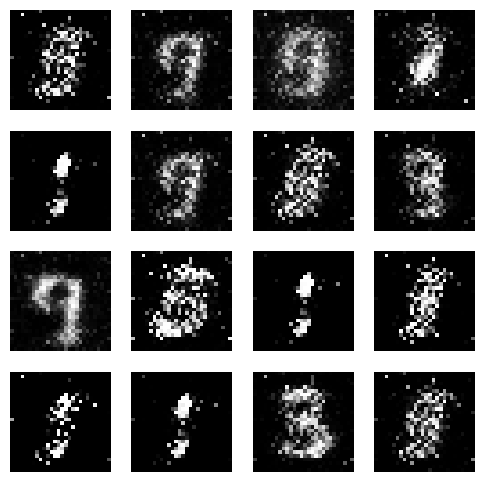

In [8]:
z = torch.randn(16, z_dim).to(device)
fake = G(z).detach().cpu()
fake = (fake + 1) / 2  # denormalize

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(fake[i][0], cmap="gray")
    plt.axis("off")
plt.show()